In [1]:
# import required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
# import geopandas
# import h5py

In [2]:
# import GEE & Libraries for map
import ee
import folium

# initialize gee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=DAkf_FxENfHDWmTXIBv87mDAANp0mqfzZhsVSOIedQ4&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWjRqimw_Flv-22elbY1922BQ-iaE8UESm-7mscdjPVIjRcITNybjwU

Successfully saved authorization token.


In [3]:
## First, you have to initialize the dictionaries
ice_area = {}
ice_centroid = {}
mapid_seg = {}
mapid_target = {}

Creating reference CDH

[57.71364032775014, -65.83345529269617]
{'type': 'Point', 'coordinates': [57.71364032775014, -65.83345529269617]}
1587733802.1318111


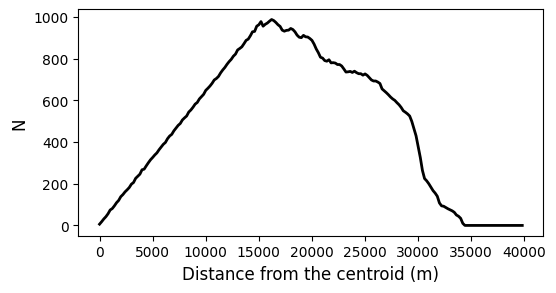

In [9]:
# Reference iceberg distribution
reference = ee.FeatureCollection('projects/ee-jay/assets/icebergd28_1')
centroid = reference.geometry().centroid(10).getInfo()['coordinates'] # [long, lat]
print(centroid)

band = ["HH", "angle"]  # intersted band

# Load Sentinel-1 images (image collection)
S1A = ee.ImageCollection("COPERNICUS/S1_GRD")\
.filterDate('2020-09-27', '2020-09-28')\
.filterBounds(reference)\
.filter(ee.Filter.listContains('transmitterReceiverPolarisation', "HH"))

img = S1A.select(band).mean().clip(reference) # clip image into ROI

scale = 200
max_pix = 40000

cover = img.select('HH').clip(reference).multiply(0).add(1)
cover = cover.addBands(ee.Image.pixelLonLat())
# coordinates = cover.reduceRegion(ee.Reducer.mean(), reference, scale = 200, maxPixels = 1e20).getInfo()

# image containing only centroid pixel
sources = ee.Image().toByte().paint(ee.Geometry.Point(centroid), 1);

# Compute the cumulative cost to traverse the land cover.
#  (distance of each pixel from centroid)
cumulativeCost = cover.select('HH').cumulativeCost(
    source = sources,
    maxDistance = 35000,
    geodeticDistance = True
).clip(reference)

hist1 = {}

## plotting the reference histogram

fig = plt.subplots(figsize = (6, 3), dpi = 100)
# reducing the cumulativeCost image to list (of distance from centroid)
result = cumulativeCost.reduceRegion(ee.Reducer.toList(), reference, scale = 200, maxPixels = 1e20);
A = result.getInfo()['cumulative_cost'] # 'cumulative_cost' 'constant'

# creating histogram using numpy
hist1['reference'] = np.histogram(A, int(max_pix/scale), [0, max_pix])
area0 = reference.geometry().area(10).getInfo()
plt.plot(hist1['reference'][1][:-1], hist1['reference'][0], color = "k", linewidth = 2)
plt.xlabel("Distance from the centroid (m)", fontsize = 12)
plt.ylabel("N", fontsize = 12)

reference.getInfo()['features'][0]
print(reference.geometry().centroid(10).getInfo())
print(area0)

In [ ]:
startdate = '2019-10-10'; enddate = '2019-10-11'
center = [70.90458847323731, -68.26582880106126]

startdate = '2019-11-01'; enddate = '2019-11-02'
center = [70.90458847323731, -68.26582880106126]

startdate = '2019-12-01'; enddate = '2019-12-02'
center = [70.93005721588, -68.2155040738]

startdate = '2020-01-01'; enddate = '2020-01-02'
center = [71.04444599848509, -68.08842666206993]

startdate = '2020-02-01'; enddate = '2020-02-02'
center = [71.39902345800324, -67.78923700510634]

startdate = '2020-03-02'; enddate = '2020-03-03'
center = [72.3545211426566, -67.28438374748328]

startdate = '2020-04-01'; enddate = '2020-04-02'
center = [73.97526841154185, -67.03631502124794]

startdate = '2020-05-01'; enddate = '2020-05-02'
center = [71.83531267440843, -66.31057215041929]

startdate = '2020-05-31'; enddate = '2020-06-01'
center = [67.38929150741328, -66.84343082499258]

startdate = '2020-06-10'; enddate = '2020-06-11'
center = [65.07665121681868, -66.7051770218426]

startdate = '2020-06-18'; enddate = '2020-06-19'
center = [64.74036550005788, -66.68779589874646]

startdate = '2020-07-01'; enddate = '2020-07-02'
center = [64.4277522440532, -66.62028145050006]

startdate = '2020-07-25'; enddate = '2020-07-26'
center = [60.03737769850604, -66.58286034707558]

startdate = '2020-08-01'; enddate = '2020-08-02'
center = [59.12996673470382, -66.4317476333774]

startdate = '2020-08-17'; enddate = '2020-08-18'
center = [59.007641086053845, -66.42128531689083]

startdate = '2020-08-29'; enddate = '2020-08-30'
center = [58.993, -66.374]

startdate = '2020-09-01'; enddate = '2020-09-02'
center = [58.95604712548171, -66.3656446750438]

startdate = '2020-09-10'; enddate = '2020-09-11'
center = [58.95226922529786, -66.35602689405376]

startdate = '2020-09-20'; enddate = '2020-09-21'
center = [58.77585871834231, -66.19588771862057]

startdate = '2020-09-26'; enddate = '2020-09-27'
center = [57.7138424312052, -65.83365093700601]

startdate = '2020-10-06'; enddate = '2020-10-07'
center = [57.59559751857808, -65.80963185213704]

startdate = '2020-10-15'; enddate = '2020-10-16'
center = [56.94075963935448, -65.53676857979124]

startdate = '2020-10-20'; enddate = '2020-10-21'
center = [56.244910404246525, -65.56402677705465]

startdate = '2020-10-25'; enddate = '2020-10-26'
center = [56.135613780955424, -65.58041769369255]

startdate = '2020-11-01'; enddate = '2020-11-02'
center = [55.93105129167465, -65.56545784890702]

startdate = '2020-11-11'; enddate = '2020-11-12'
center = [55.74962560421445, -65.5437990500076]

2021-03-21 ============================================
0
2021-03-22 ============================================
0
2021-03-23 ============================================
0
2021-03-24 ============================================
0
2021-03-26 ============================================
1
Feature 0 >>> area: 1732.65 km^2, centroid: [44.124, -67.108], similarity: 0.693
2021-03-27 ============================================
0
2021-03-28 ============================================
1
Feature 0 >>> area: 1616.25 km^2, centroid: [44.138, -67.149], similarity: 0.806
... exporting task for 2021-03-28


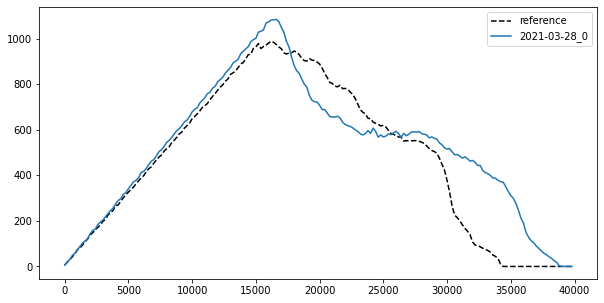

In [ ]:
startdate = '2020-12-01'; enddate = '2020-12-02'
center = [54.96846739679307, -65.44742013363125]

startdate = '2020-12-17'; enddate = '2020-12-18'
center = [54.84388445838838, -65.38637877779847]

startdate = '2020-12-24'; enddate = '2020-12-25'
center = [54.69116343708865, -65.34624391816247]

startdate = '2021-01-01'; enddate = '2021-01-02'
center = [54.02062661478225, -65.27358542196139]

startdate = '2021-01-10'; enddate = '2021-01-11'
center = [53.81380831616237, -65.36436201127354]

startdate = '2021-01-20'; enddate = '2021-01-21'
center = [53.77016291710264, -65.3633132870983]

startdate = '2021-02-01'; enddate = '2021-02-02'
center = [53.08547843049469, -65.3211005747]

startdate = '2021-02-26'; enddate = '2021-02-27'
center = [51.46522369849041, -65.58657291544631]

startdate = '2021-03-20'; enddate = '2021-03-21'
center = [48.13312978712529, -66.29489767494789]

buf_dist = 35000 # buffer distance to find from the center to find icebergs

# Map initialization (note: if you run this code, map is entirely initialized!)
map1 = folium.Map(location=[center[1], center[0]], zoom_start=7, height=550,width=700)

# color codes to visualize the iceberg geometry by time
color_codes = ['red', 'chocolate', 'orange', 'yellow', 'olive', 'lime',
               'green', 'teal', 'cyan', 'blue', 'navy', 'purple']

# First buffer area near amery ice shelf
amery = ee.Geometry.Point(center).buffer(buf_dist);

day_range = range(0,10)

vectorscale = 40

fig = plt.subplots(figsize = (10, 5))
plt.plot(hist1['reference'][1][:-1], hist1['reference'][0], label = "reference", color = "k", linestyle = "--")

for day in day_range:
    
    month = dt.datetime.strptime(startdate, "%Y-%m-%d").month
    band = ["HH", "angle"]  # intersted band
    
    # Amery iceshelf region
    # can also be a rectangle
    amery = ee.Geometry.Point(center).buffer(buf_dist)

    # Load Sentinel-1 images (image collection)
    S1A = ee.ImageCollection("COPERNICUS/S1_GRD")\
    .filterDate(startdate, enddate)\
    .filterBounds(amery)\
    .filter(ee.Filter.listContains('transmitterReceiverPolarisation', "HH"))
    
    if S1A.size().getInfo() > 0:
        imageA = S1A.select(band).mean().clip(amery) # clip image into ROI

        seeds = ee.Algorithms.Image.Segmentation.seedGrid(100);
        
        # Gaussian kernel to softening the image (remove some salt and pepper noise)
        kernel = ee.Kernel.gaussian(3)
        img1 = imageA.convolve(kernel)
        img = img1.select(['HH', 'angle'], ['HH', 'angle'])

        vis_seg = {'bands': ["HH"], 'min': -30, 'max': 0, 'region': amery}
        mapid_seg[startdate] = img.getMapId(vis_seg)

        folium.TileLayer(
          tiles=mapid_seg[startdate]['tile_fetcher'].url_format,
          attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
          overlay=True,
          name='S1_{0}'.format(startdate),
          ).add_to(map1)
                
        
        # SNIC image segmentaion
        # https://developers.google.com/earth-engine/apidocs/ee-algorithms-image-segmentation-snic
        snic = ee.Algorithms.Image.Segmentation.SNIC(img, 20, 5, 8, 256, seeds)\
        .select(["HH_mean", "angle_mean", "clusters"], ["HH", "angle", "clusters"])
        # ee.Algorithms.Image.Segmentation.SNIC(image, size, compactness, connectivity, neighborhoodSize, seeds)
        
        segments = snic.select("clusters").reduceToVectors(
            geometry = snic.geometry(),
            scale = vectorscale,
            geometryType = 'polygon',            
            maxPixels = 1e20
        )     
        
        segimageA = segments.reduceToImage(
            properties = ['label'],
            reducer = ee.Reducer.first()
        ).rename('id')       

        ratio = snic.select("HH").divide(snic.select("angle"))
        icebergs = ratio.gt(-0.2).selfMask()     
        
        # Convert iceberg raster to vector
        vectors = icebergs.reduceToVectors(
            geometry = icebergs.geometry(),
            scale = vectorscale,
            geometryType = 'polygon',            
            maxPixels = 1e20)

        def addArea(feature):
            return feature.set({"area": feature.geometry().area(10), "centroid": feature.geometry().centroid(10)});

        # Add area (with ±10% error) and centroid information to the iceberg vectors 
        area_max = area0 * 1.1
        area_min = area0 * 0.9
        areaAdded = vectors.map(addArea)
    
        target = areaAdded.filter(ee.Filter.gt('area', area_min)).filter(ee.Filter.lt('area', area_max))
        
        num = target.size().getInfo()
        features = target.getInfo()['features']
        
        print(startdate + " ============================================")
        print(num)
        threshold = 0.70
        
        for k in range(0, num): # if there is a valid iceberg
            
            area = features[k]['properties']['area']
            centroid = features[k]['properties']['centroid']['coordinates']
            polygon = ee.FeatureCollection(ee.Geometry.Polygon(features[k]['geometry']['coordinates'][0]))
            sources = ee.Image().toByte().paint(ee.Geometry.Point(centroid), 1);
            covers = snic.select('HH').multiply(0).add(1)
            
            cumCost = covers.cumulativeCost(
                source = sources,
                maxDistance = 35000,
                geodeticDistance = True
            ).clip(polygon)

            result = cumCost.reduceRegion(ee.Reducer.toList(), polygon, scale = 200)
            cumdist = result.getInfo()['cumulative_cost']
            B = np.histogram(cumdist, int(max_pix/scale), [0, max_pix])  
            
            diff = abs(hist1['reference'][0] - B[0])
            similarity = 1-np.sum(diff)/np.sum(hist1['reference'][0])          
            
            print("Feature {0} >>> area: {1} km^2, centroid: [{2}, {3}], similarity: {4}".format(
                k, round(area/1e6,2), round(centroid[0],3), round(centroid[1], 3), round(similarity, 3)
            ))                       
            
            if similarity >= threshold:
                
                ice_area[startdate] = area
                ice_centroid[startdate] = centroid
                hist1[startdate] = B 
                plt.plot(B[1][:-1], B[0], label = startdate + "_" + str(k))
                  
                threshold = similarity
                
                def add_columns(feature):
                    return feature.set({"area": feature.geometry().area(10),
                                        "centroid": feature.geometry().centroid(10),
                                        "similarity": similarity,
                                        "refdate": '2021-03-01'});
                
                polygon2 = polygon.map(add_columns)
                
                task = ee.batch.Export.table.toDrive(
                    collection = polygon2,
                    folder = 'iceberg_tracking',
                    description = "Iceberg_{0}".format(startdate),
                    fileFormat = 'GeoJSON'
                )
                
                task.start()
                
                print("... exporting task for {0}".format(startdate))
                
                ## Mapping images ==========================================
                # Original image -----------------------------------
                
                # Segmentation result -----------------------------------
                # vis_seg = {'color': 'red'}
                # seg_tile = segments.getMapId(vis_seg)

                # folium.TileLayer(
                #   tiles=seg_tile['tile_fetcher'].url_format,
                #   attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
                #   overlay=True,
                #   name="seg_" + startdate,
                # ).add_to(map1)
        
                vis_target = {'color': color_codes[month-1]}
                xyz = polygon.draw("#800080")
                abc = xyz.clip(ee.Geometry.Point(centroid).buffer(1000))
                mapid_target = abc.getMapId(vis_target) 

                # Map of iceberg vectors ---------------------------------
                folium.TileLayer(
                    tiles=mapid_target['tile_fetcher'].url_format,
                    attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
                    overlay=True,
                    name=startdate + "_" + str(k),
                ).add_to(map1) 
                ## ===========================================================
                
                center = centroid
                buf_dist = 0
            
            
    if (buf_dist > 350000) or (startdate == "2021-03-31"): # If the buffer distance become so large, break the loop
        print("!!! STOP !!! buffer {0} km ( {1} )".format(buf_dist, startdate))
        break
    
    buf_dist += 35000 # add 25km OR 35km buffer for everyday searching process
    startdate = enddate
    enddate = (dt.datetime.strptime(enddate, "%Y-%m-%d") + dt.timedelta(days=1)).strftime("%Y-%m-%d")

plt.legend()
map1.add_child(folium.LayerControl())
map1

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# show the trajectory of the iceberg
import os
path = '/content/drive/My Drive/Iceberg_tracking'
file_list = os.listdir(path)

center = [68.93005721588, -66.2155040738]
map2 = folium.Map(location=[center[1], center[0]], zoom_start=5, height=550,width=700)

# color codes to visualize the iceberg geometry by time
color_codes = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#0000FF', '#4B0082',
               '#EE82EE', '#332421', '#00FFFF', '#FF69B4', '#008080', '#800080']

k = 0

for geojson_file in file_list:
  # open the geojson file and extract centoid information from it
  file_path = path + '/' + str(geojson_file)
  df = pd.read_json(file_path)
  features = df.iloc[0]['features']
  
  # convert geoJSON centroid information to FeatureCollection
  refdate = features['properties']['refdate']
  # month = int(refdate[5:7])
  centroid = features['properties']['centroid']['coordinates']
  centroid_fc = ee.FeatureCollection(ee.Geometry.Point(centroid).buffer(2000))
  # print(centroid)

  # add color to the centroid 
  month = int(geojson_file[13:15])
  centroid_img = centroid_fc.draw(color_codes[month-1])
  mapid_target = centroid_img.getMapId() 

  # Map of iceberg vectors ---------------------------------
  k += 1
  folium.TileLayer(
  tiles=mapid_target['tile_fetcher'].url_format,
  attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
  overlay=True,
  name='img'+'_'+str(k),
  ).add_to(map2)

map2.add_child(folium.LayerControl())
map2
  

In [31]:
file_path = path + '/' + file_list[0]
df0 = pd.read_json(file_path)
features1= df0.iloc[0]['features']
centroid1 = ee.Geometry.Point(features1['properties']['centroid']['coordinates'])
date1 = dt.datetime.strptime(file_list[0][8:18], "%Y-%m-%d")
# startdate

dist = []
speed = []

for geojson_file in file_list:
  # open the geojson file and extract centoid information from it
  file_path = path + '/' + str(geojson_file)
  df = pd.read_json(file_path)
  features = df.iloc[0]['features']
  
  # convert geoJSON centroid information to Geomtery
  refdate = features['properties']['refdate']
  centroid2 = ee.Geometry.Point(features['properties']['centroid']['coordinates'])

  # find distance & speed between 2 consecutive images
  distance = centroid1.distance(centroid2)
  dist.append(distance.getInfo())
  date2 = dt.datetime.strptime(geojson_file[8:18], "%Y-%m-%d")
  if date1 != date2:
    days = (date2-date1).days
    speed.append(distance.getInfo()/days)

  date1 = date2
  centroid1 = centroid2

# conversion to datetime
# date = dt.datetime.strptime(features1['properties']['refdate'], "%Y-%m-%d")
# date1 = dt.datetime.strptime(file_list[0][8:18], "%Y-%m-%d")
# date2 = dt.datetime.strptime(file_list[1][8:18], "%Y-%m-%d")

print(dist)
print(speed)

[0, 1120.067559140888, 546.118790325387, 125.7833381074099, 134.19271237498685, 1617.7503656073948, 2664.4959626245277, 2842.5239918632633, 2180.9118056602506, 292.56641085050654, 1317.741060872316, 481.3866952843477, 1466.9607857613198, 21.779118822782248, 1672.1658448319847, 1144.956770916624, 125.63115533103563, 438.3334986841289, 2889.7439737143623, 2280.4276114516174, 785.8295806559528, 970.902900399242, 260.23515624279287, 2015.0935376515408, 3474.9970489104653, 1295.9478552271457, 2672.943599999247, 7302.851208094496, 1106.991150662947, 2566.949831828192, 2838.03731608708, 3188.0281781480116, 4104.179922811492, 7582.971470003722, 4509.165338266974, 2350.37685297158, 4428.756402118262, 5039.883413979439, 5282.156735851029, 12868.86642074967, 3178.589708736746, 9826.544324404675, 11910.16739173208, 13082.96210700452, 3806.983554906756, 10111.709586469273, 13986.755897491677, 6982.077879813872, 12703.27092609824, 6925.568416918005, 4734.943144488952, 4875.5891643151535, 1503.767431

In [38]:
d_n = len(dist)-1
s_n = len(speed)
total_dist = 0
t_speed = 0
for x in dist:
  total_dist += x
for y in speed:
  t_speed += y

avg_speed = t_speed/s_n
print(total_dist)
print(avg_speed)

2156484.148405096
2582.1472078144784


In [36]:
import os
import pandas as pd
path = '/content/drive/My Drive/Iceberg_tracking'
file_list = os.listdir(path)
file_path = path + '/' + file_list[1]
df = pd.read_json(file_path)
features1= df.iloc[0]['features']
centroid1 = ee.Geometry.Point(features1['properties']['centroid']['coordinates'])

file_path = path + '/' + file_list[2]
df = pd.read_json(file_path)
features1= df.iloc[0]['features']
centroid2 = ee.Geometry.Point(features1['properties']['centroid']['coordinates'])
# print(len(file_list))
# print(file_list[-2][8:18])
distance = centroid1.distance(centroid2)
date1 = dt.datetime.strptime(file_list[1][8:18], "%Y-%m-%d")
date2 = dt.datetime.strptime(file_list[2][8:18], "%Y-%m-%d")
days = (date2-date1).days
print(distance.getInfo()/days)
print(len(dist))
print(len(speed))

182.03959677512898
124
122
